# Семинар 7 - Полносязные нейронные сети (fully connected neural network)

In [0]:
import random
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

139780096/170498071 [=======================>......] - ETA: 4s

In [0]:
print('В трейне: ', x_train.shape[0], 'объектов, в тесте: ', x_test.shape[0])

В трейне:  50000 объектов, в тесте:  10000


In [0]:
num_classes = 10 #
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

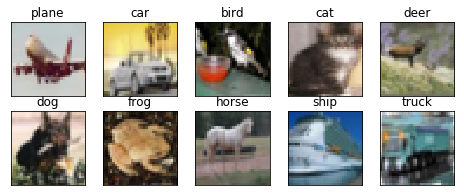

In [0]:
# Сгенерируем случаные примеры для каждого класса
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
x_train, x_val, y_train, y_val =  train_test_split(x_train, y_train, test_size=1000, train_size=49000)

In [0]:
print('Training data shape: ', x_train.shape)
print('Validation data shape: ', x_val.shape)
print('Test data shape: ', x_test.shape)

Training data shape:  (49000, 32, 32, 3)
Validation data shape:  (1000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
from keras.models import Sequential # Модель, где все слои соединены друг с другом
from keras.layers import Dense, Flatten, Activation # Слой, где все нйероны предыдущего уровня соединены с нейронами следующего
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

In [0]:
np.random.seed(18)

x_train = x_train.astype('float32')
x_val= x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes=num_classes)
y_val = np_utils.to_categorical(y_val, num_classes=num_classes)
y_test = np_utils.to_categorical(y_test, num_classes=num_classes)

In [0]:
# Создаем последовательную модель
model = Sequential()

# Добавляем слои

model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(3072))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Компилируем модель
opt = RMSprop(lr=0.0001, decay=1e-6) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

early_stop = EarlyStopping(monitor='val_acc', 
                                           min_delta=0, 
                                           patience=5, 
                                           verbose=0, 
                                           mode='auto')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
activation_1 (Activation)    (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________
None


## _Пояснения:_
1. Почему используем RMSprop читаем [тут](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)  
2. Binary Cross entropy vs Categorical cross entropy:
$$ L = -\frac{1}{n} \sum_{i=1}^{n} {\bigl[y_i log(p_i)+(1−y_i)log(1−p_i)\bigr]} =-\frac{1}{n} \sum_{j=1}^{m}y_{ij}log(p_{ij})  $$
3. Softmax — это обобщение логистической функции для многомерного случая:
$$ \sigma (z)_i = \frac {e^{z_i}}{\sum_K{e^{z_k}}} $$
функция преобразует вектор $z$ размерности $K$ в вектор $\sigma$  той же размерности, где каждая координата $\sigma_i$ полученного вектора представлена вещественным числом в интервале $[0,1]$ и сумма координат равна 1.
4. Почему $32 \times 32 \times 3 \times 3072 = 9437184$, а параметров на первом слое: $9 440 256$

In [0]:
batch_size = 320 # Выбираем размер Батча
epochs = 100 # повторим 100 раз

In [0]:
# Обучаем модель! 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              callbacks=[early_stop],
              shuffle=True)

Train on 49000 samples, validate on 1000 samples
Epoch 1/100
49000/49000 [==============================] - 55s 1ms/step - loss: 2.1410 - acc: 0.2727 - val_loss: 2.3562 - val_acc: 0.2350
Epoch 2/100
49000/49000 [==============================] - 63s 1ms/step - loss: 1.8754 - acc: 0.3407 - val_loss: 2.0590 - val_acc: 0.2840
Epoch 3/100
49000/49000 [==============================] - 53s 1ms/step - loss: 1.7651 - acc: 0.3784 - val_loss: 2.1832 - val_acc: 0.2570
Epoch 4/100
49000/49000 [==============================] - 63s 1ms/step - loss: 1.7028 - acc: 0.3997 - val_loss: 2.1590 - val_acc: 0.2680
Epoch 5/100
49000/49000 [==============================] - 60s 1ms/step - loss: 1.6452 - acc: 0.4196 - val_loss: 1.8878 - val_acc: 0.3560
Epoch 6/100
49000/49000 [==============================] - 55s 1ms/step - loss: 1.6086 - acc: 0.4355 - val_loss: 2.0081 - val_acc: 0.3390
Epoch 7/100
49000/49000 [==============================] - 52s 1ms/step - loss: 1.5692 - acc: 0.4474 - val_loss: 1.7137 - v

In [0]:
predict = model.predict(x_test)

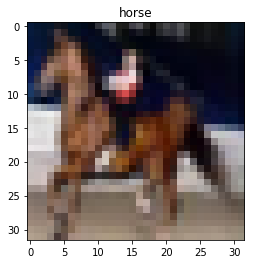

plane 0.00018598826
car 0.00015580087
bird 3.301985e-05
cat 0.00034022474
deer 0.0045140963
dog 0.0023937575
frog 0.0001667557
horse 0.99187887
ship 2.0976806e-05
truck 0.0003105262


In [0]:
# Проверим случаный семпл:
num_pred = np.random.randint(0,999)
plt.title(class_names[np.where(y_test[num_pred]==1)[0][0]])
plt.imshow(x_test[num_pred])
plt.show()
for i,j in enumerate(class_names):
    print(j, predict[num_pred][i])